In [14]:
%reload_ext autoreload
%autoreload 2

import sys

import py21cmfast as p21c
from astropy.cosmology import Planck18

sys.path.append("..")
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve

In [2]:
return_dict = evolve(
    run_name = 'test',
    z_start = 45.,
    z_end = 35.,
    zplusone_step_factor = 1.01,
    dm_params = DMParams(
        mode='swave',
        primary='phot_delta',
        m_DM=1e10,
        sigmav=1e-23,
        struct_boost_model='erfc 1e-3',
    ),
    enable_elec = False,
    tf_version = '230629',
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 64,
            BOX_LEN = 64 * 2, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om(0),
            OMb = Planck18.Ob(0),
            POWER_INDEX = Planck18.meta['n'],
            SIGMA_8 = Planck18.meta['sigma8'],
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    
    rerun_DH = False,
    clear_cache = False,
    use_tqdm = True,
)

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
INFO:root:Using 21cmFAST version 0.1.dev1579+g6b1da6d.d20230914
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/test
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA Interpreter
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:DarkHistoryWrapper: Found existing DarkHistory initial condi

In [3]:
return_dict['profiler'].print_summary()

xray: 2.0533 +/- 0.5555 s
bath+dm: 0.0694 +/- 0.0035 s
21cmFAST: 0.0370 +/- 0.0090 s
prep_next: 0.0876 +/- 0.0368 s


<Axes: xlabel='Iteration', ylabel='Time [s]'>

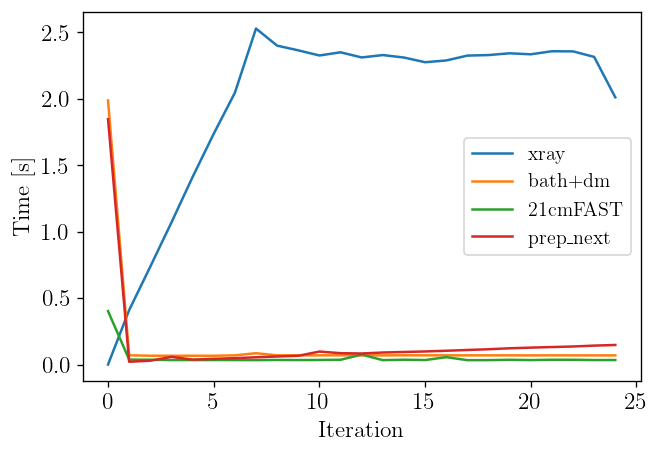

In [4]:
return_dict['profiler'].plot()

## Profiling

In [15]:
import cProfile
import pstats

In [16]:
def f():
    return_dict = evolve(
        run_name = 'test',
        z_start = 45.,
        z_end = 35.,
        zplusone_step_factor = 1.01,
        dm_params = DMParams(
            mode='swave',
            primary='phot_delta',
            m_DM=1e10,
            sigmav=1e-23,
            struct_boost_model='erfc 1e-3',
        ),
        enable_elec = False,
        tf_version = '230629',
        
        p21c_initial_conditions = p21c.initial_conditions(
            user_params = p21c.UserParams(
                HII_DIM = 64,
                BOX_LEN = 64 * 2, # [conformal Mpc]
                N_THREADS = 32,
            ),
            cosmo_params = p21c.CosmoParams(
                OMm = Planck18.Om(0),
                OMb = Planck18.Ob(0),
                POWER_INDEX = Planck18.meta['n'],
                SIGMA_8 = Planck18.meta['sigma8'],
                hlittle = Planck18.h,
            ),
            random_seed = 54321,
            write = True,
        ),
        
        rerun_DH = False,
        clear_cache = False,
        use_tqdm = True,
    )   

In [17]:
profiler = cProfile.Profile()
profiler.enable()
f()
profiler.disable()

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/inputs.py:487: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
INFO:root:Using 21cmFAST version 0.1.dev1579+g6b1da6d.d20230914
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/test
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA Interpreter
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': module 'jaxlib.xla_extension' has no attribute 'get_tpu_client'
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:DarkHistoryWrapper: Found existing DarkHistory initial condi

In [18]:
stats = pstats.Stats(profiler).sort_stats('cumulative')

stats.print_stats()

         6510635 function calls (6484959 primitive calls) in 34.073 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000   37.001   18.500 /n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3490(run_code)
      7/2    0.000    0.000   37.001   18.500 {built-in method builtins.exec}
        1    0.002    0.002   37.001   37.001 /tmp/ipykernel_864040/3362387070.py:1(f)
        1    0.033    0.033   31.907   31.907 /n/home07/yitians/dm21cm/DM21cm/notebooks/../dm21cm/evolve.py:30(evolve)
      105    0.021    0.000   12.978    0.124 /n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_utils.py:1126(read)
      406    0.302    0.001   10.894    0.027 /n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/h5py/_hl/dataset.py:742(__getitem__)
      400   10.574    0.026   10.574    0.026 {method 'read' of 'h5py._selector.Re